In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,:2] # all rows and first 2 cols
y = (iris.target == 0).astype(int) # compare and get the Y for binary classification

In [4]:
class Perceptron:
  def __init__(self,lr=0.01,epochs=50):
    self.lr = lr
    self.epochs = epochs
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    n_samples , n_features = X.shape  # get number of sample and feature from the X input
    self.weights = np.zeros(n_features) # putting all the weights to 0
    self.bias = 0 # bias to 0

    for epoch in range(self.epochs): # running epcohs 
      for idx,x_i in enumerate(X):  #idx is index and x_i is faetaure from current sample
        # Prediction
        linear_output = np.dot(x_i,self.weights) + self.bias  # calculate the linear_ouput of the perceptron from the current sample
        y_pred = 1 if linear_output >=0 else 0     #if the liner_oyput is equal or greater then 0 put it one else 0

        # Updation of weights
        update = self.lr * (y[idx] - y_pred) # in this specific case - Gradient and Error both are same / and difference bwtn true label and predict label
        self.weights += update*x_i   # update weight
        self.bias += update   # update bias

      if epoch % 10 == 0:    # after every  10 epcoh plot dicision boundary
        self.plot_decision_boundary(X,y,epoch)

  def predict(self,X):  # this method perdicted new class labels from new data X
    linear_output = np.dot(X,self.weights) + self.bias  # calculate linear output from each sample
    return np.where(linear_output >=0,1,0) # return an array of perdiction of 0,1

  def plot_decision_boundary(self,X,y,epoch):   # plotting graph of decision boundary

    if self.weights[1] == 0:
      return # avoiding the division by 0 in line 39

    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',alpha=0.7)
    x_vals = np.linspace(X[:,0].min(),X[:,0].max(),100)
    y_vals = -(self.weights[0] * x_vals + self.bias) / self.weights[1]
    plt.plot(x_vals,y_vals,'k')
    plt.title(f"Perceptron algo - epoch -> {epoch+1}")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Weidth")

    plt.show()



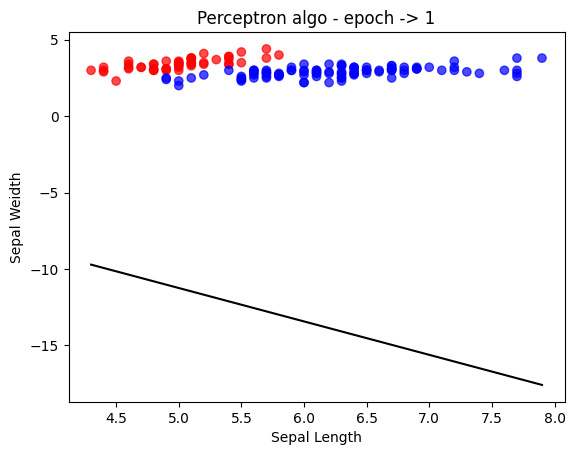

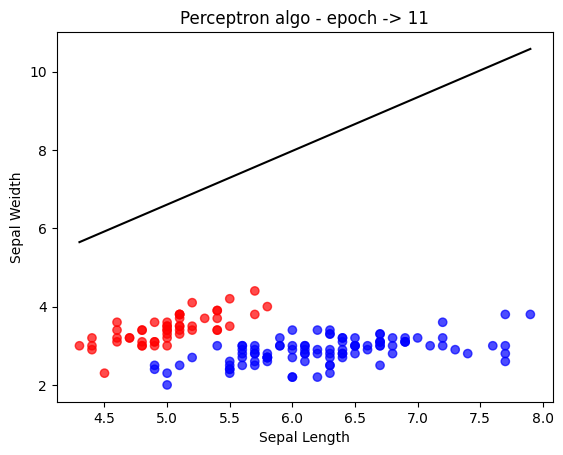

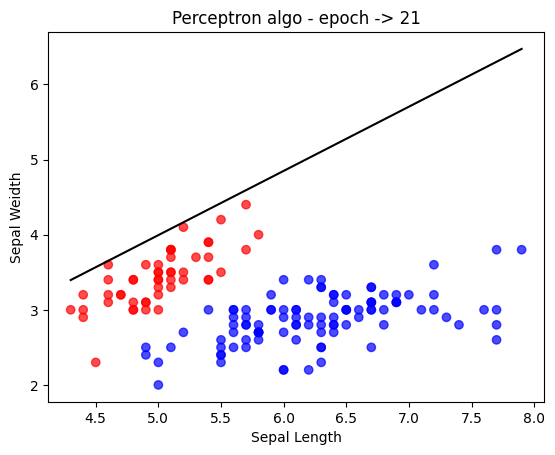

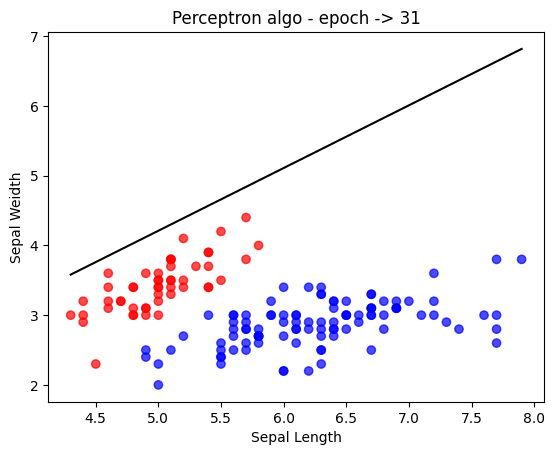

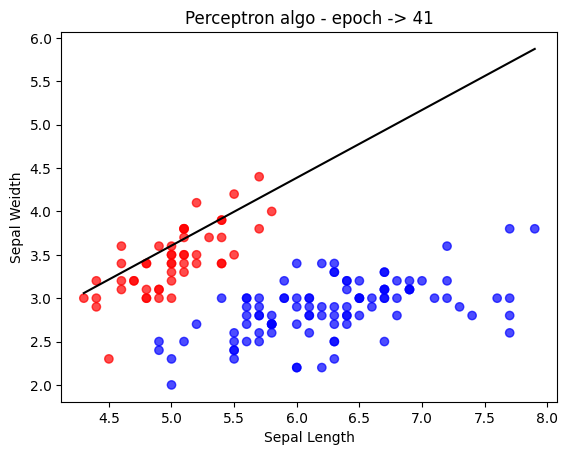

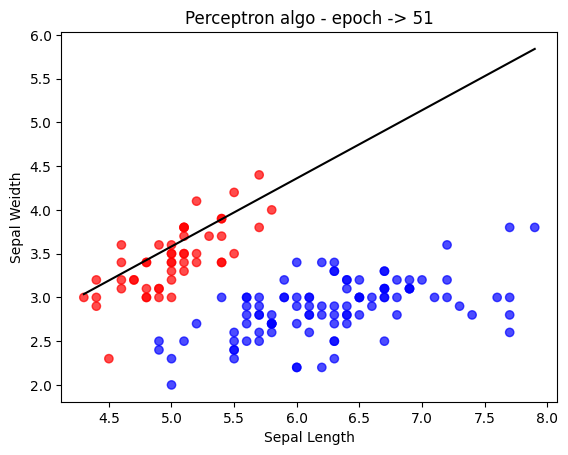

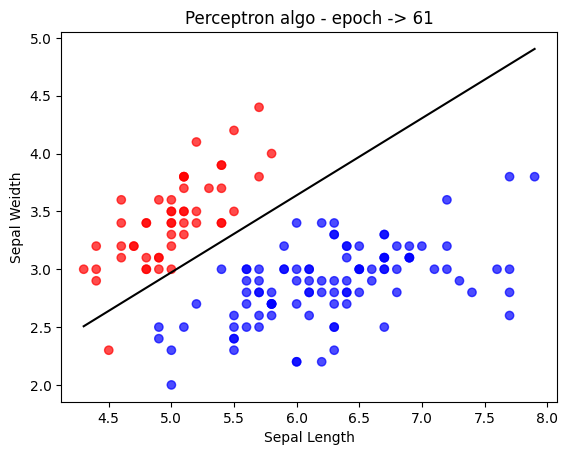

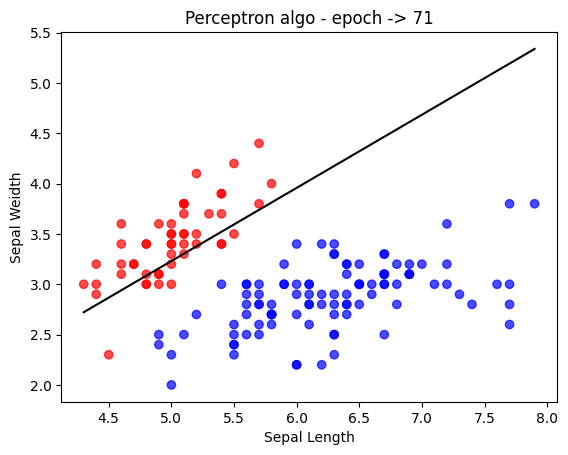

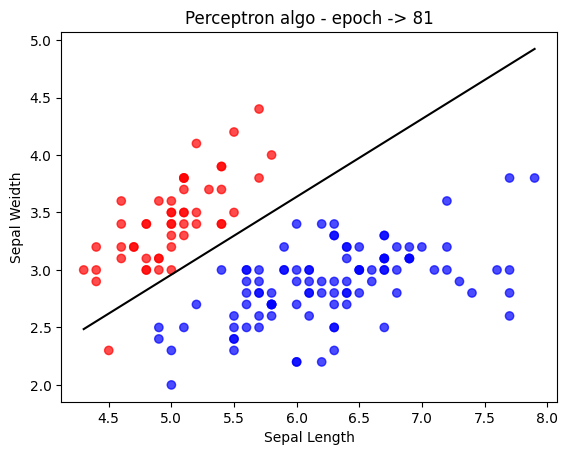

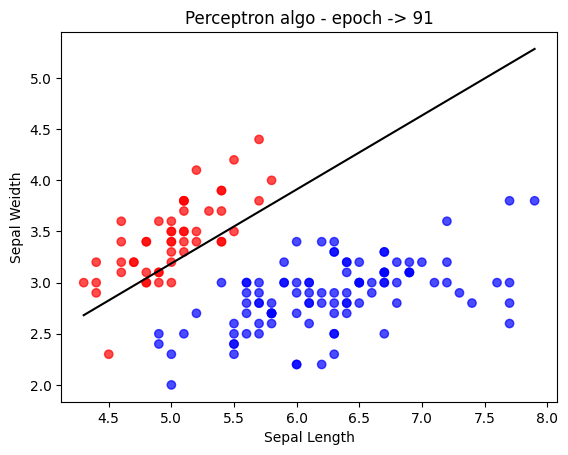

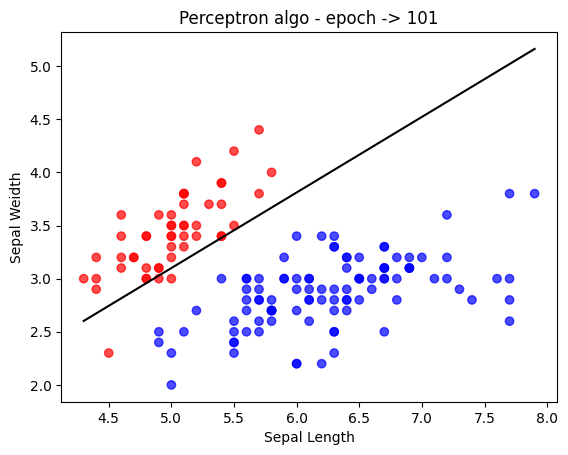

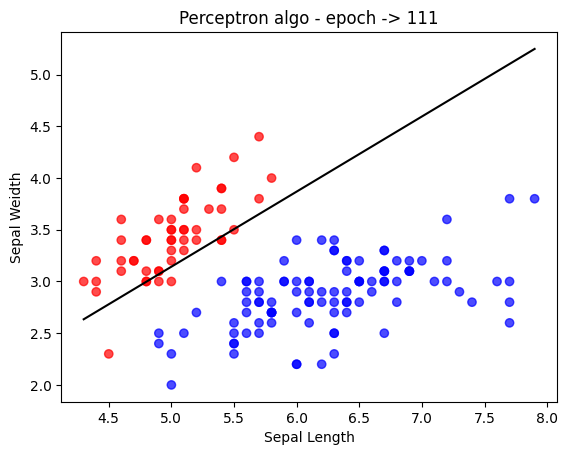

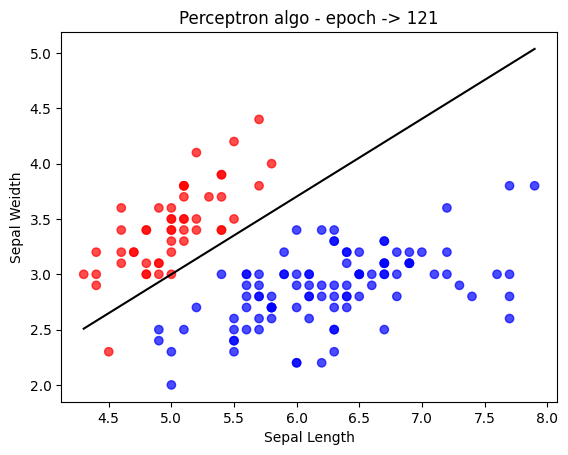

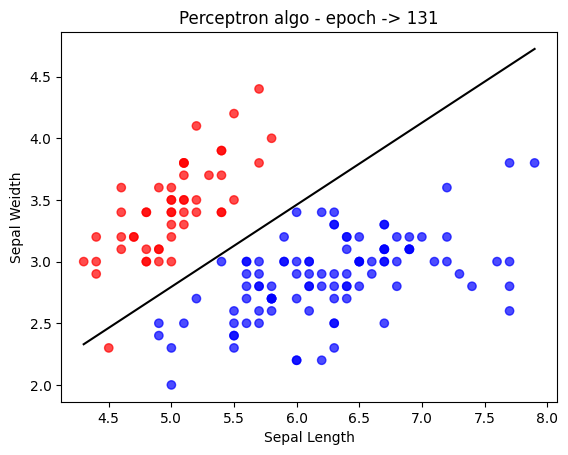

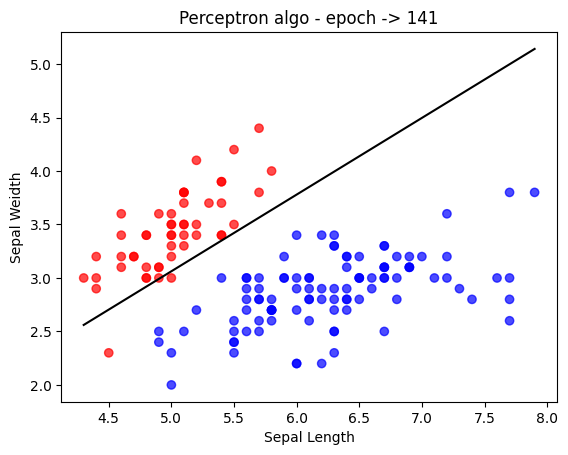

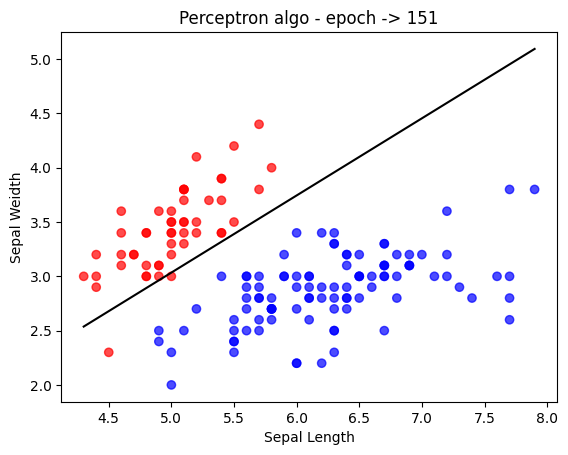

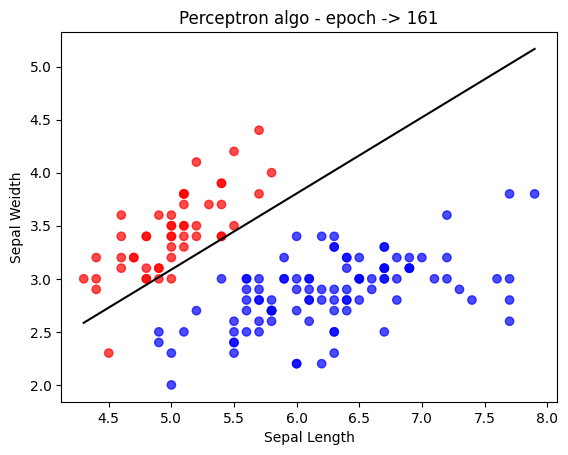

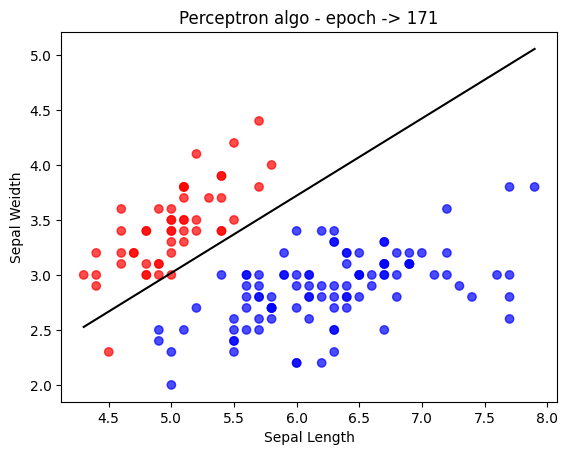

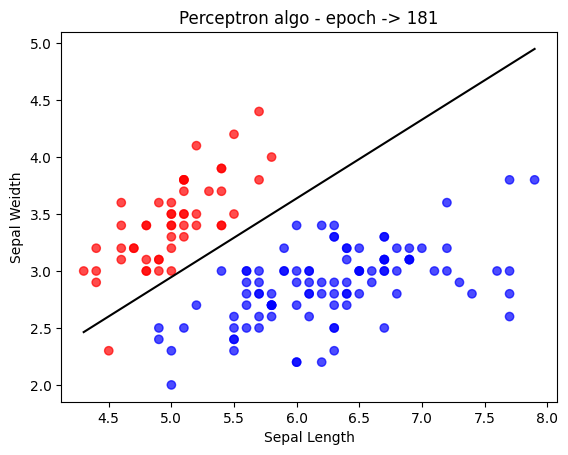

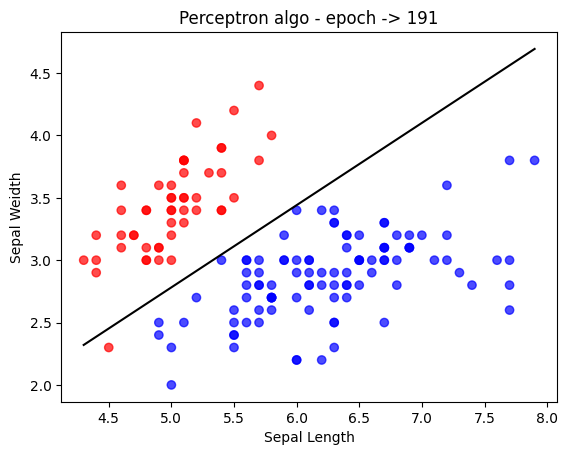

In [5]:
preceptron = Perceptron(0.01,200)
preceptron.fit(X,y)